In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
from matplotlib import rcParams

In [6]:
rcParams['figure.figsize']=14,7
rcParams['axes.spines.top']=False
rcParams['axes.spines.right']=False

data=load_breast_cancer()

In [9]:
df=pd.concat([
   pd.DataFrame(data.data,columns=data.feature_names),
   pd.DataFrame(data.target,columns=['y'])
],axis=1)
  

In [11]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X=df.drop('y',axis=1)
y=df['y']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

ss=StandardScaler()
X_train_sacled=ss.fit_transform(x_train)
X_test_scaled=ss.transform(x_test)

In [17]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train_sacled,y_train)
importance=pd.DataFrame(data={
    "Attribute":x_train.columns,
    "Importance":model.coef_[0]
})
importance=importance.sort_values(by="Importance",ascending=False)

importance=pd.DataFrame(data={
    "Attribute":x_train.columns,
    "Importance":model.coef_[0]
})
importance=importance.sort_values(by="Importance",ascending=False)

Let’s examine the coefficients visually next

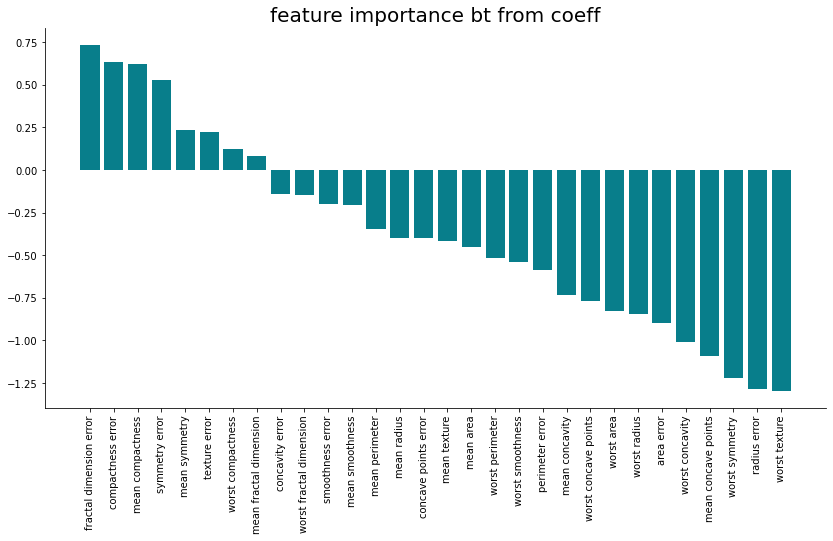

In [19]:
plt.bar(x=importance['Attribute'],height=importance['Importance'],color='#087E8B')
plt.title("feature importance bt from coeff",size=20)
plt.xticks(rotation='vertical')
plt.show()        